In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv("titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [3]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [5]:
#Check number of missing values in each column
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [6]:
#Handle missing values
#Drop cabin column

df = df.drop(columns="Cabin", axis=1) #use axis as 1 when dropping a column

In [7]:
#Replacing missing values in Age column with mean values
df["Age"].fillna(df["Age"].mean(), inplace=True)

In [46]:
df["Fare"].fillna(df["Fare"].mean(), inplace=True)

# Exploratory Data Analysis

In [48]:
#Finding the number of people who have survived and not survived
df["Survived"].value_counts()

0    266
1    152
Name: Survived, dtype: int64

<Axes: xlabel='Survived', ylabel='count'>

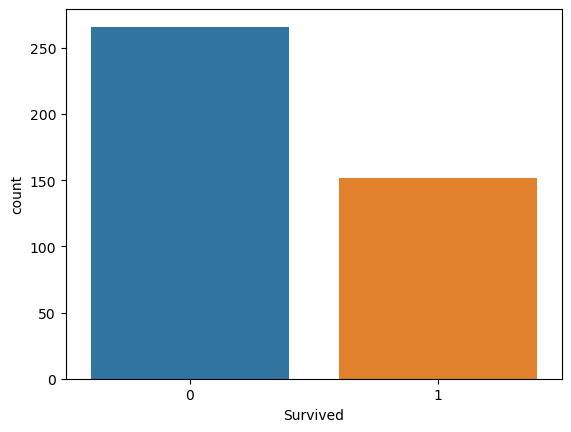

In [49]:
#Making a countplot for survived column
sns.countplot(data=df, x = "Survived")

In [50]:
df["Sex"].value_counts()

0    266
1    152
Name: Sex, dtype: int64

<Axes: xlabel='Sex', ylabel='count'>

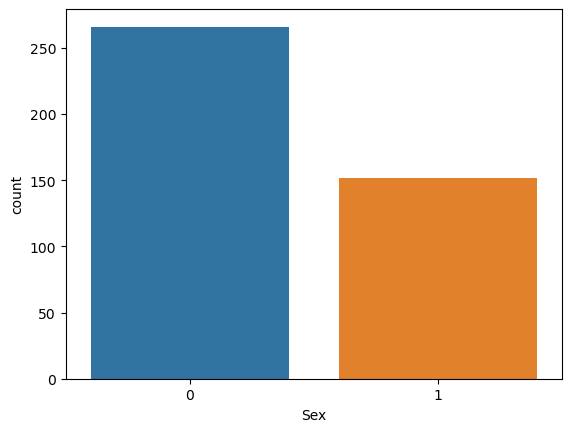

In [51]:
sns.countplot(data=df, x = "Sex")

<Axes: xlabel='Pclass', ylabel='count'>

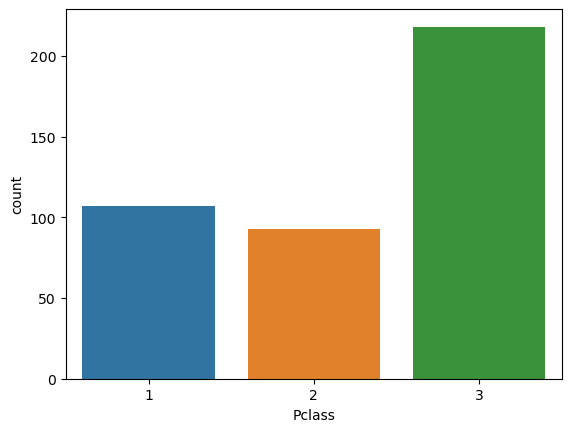

In [52]:
sns.countplot(data=df, x = "Pclass")

<Axes: xlabel='Pclass', ylabel='count'>

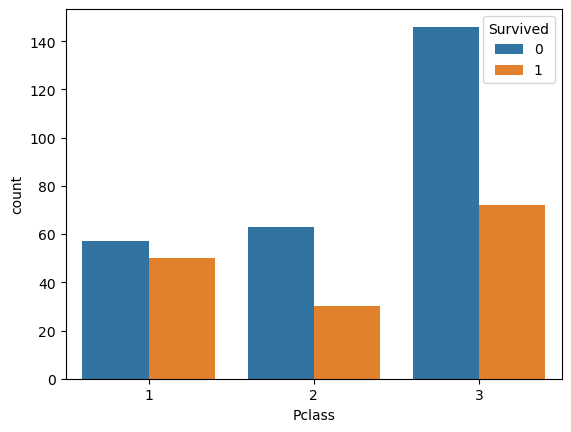

In [53]:
#Compare number of survivors class-wise
sns.countplot(x="Pclass", hue="Survived", data=df)

# Label Encoding

In [54]:
#Cob=nverting Categorical columns
df.replace({"Sex":{'male':0,"female":1}, "Embarked":{'S':0,"C":1,"Q":2}}, inplace = True)

In [55]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,2
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,0
2,894,0,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,2
3,895,0,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,0
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,0


In [65]:
#Separating features and target
X = df.drop(columns=["Name","PassengerId","Ticket","Survived"],axis=1)
Y = df["Survived"]

In [81]:
print(X)

     Pclass  Sex       Age  SibSp  Parch      Fare  Embarked
0         3    0  34.50000      0      0    7.8292         2
1         3    1  47.00000      1      0    7.0000         0
2         2    0  62.00000      0      0    9.6875         2
3         3    0  27.00000      0      0    8.6625         0
4         3    1  22.00000      1      1   12.2875         0
..      ...  ...       ...    ...    ...       ...       ...
413       3    0  30.27259      0      0    8.0500         0
414       1    1  39.00000      0      0  108.9000         1
415       3    0  38.50000      0      0    7.2500         0
416       3    0  30.27259      0      0    8.0500         0
417       3    0  30.27259      1      1   22.3583         1

[418 rows x 7 columns]


In [69]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=2)

# Model Training

In [71]:
#Using Logistic Regression model. Uses Sigmoid-curve, Y = 1/1+e^-Z where Z = w.X + b(X - input features, Y - Prediction Probability, w-weights, b-biases)
model = LogisticRegression()

In [72]:
model.fit(X_train, Y_train)

LogisticRegression()

# Model Evaluation

In [79]:
#Performance metrics on test data
X_test_prediction = model.predict(X_test)

In [80]:
data_accuracy = accuracy_score(Y_test, X_test_prediction)
print("Accuracy: ",data_accuracy * 100)

Accuracy:  100.0


In [82]:
new_data = pd.DataFrame({'Pclass':[3],"Sex":[1],"Age":[30],"SibSp":[1],"Parch":[0],"Fare":[8.000],"Embarked":[1]})

In [89]:
prediction = model.predict(new_data)
if prediction == 0:
    print("Doesn't Survive")
else:
    print("Will Survive")

Will Survive
